Import de bibliotecas

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neural_network_lib.neural_network import NeuralNetwork


Tratamento de dados

In [50]:
# Carregar os CSVs
df_pokedex = pd.read_csv('../../datasets/pokemon/pokemon.csv')
df_combats = pd.read_csv('../../datasets/pokemon/combats.csv')

# Printar as colunas de cada DataFrame
print("Colunas do df_pokedex:")
print(df_pokedex.columns)

print("\nColunas do df_combats:")
print(df_combats.columns)

Colunas do df_pokedex:
Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

Colunas do df_combats:
Index(['First_pokemon', 'Second_pokemon', 'Winner'], dtype='object')


In [51]:
df_merge = pd.merge(
    df_combats,
    df_pokedex,
    how='left',
    left_on='First_pokemon',
    right_on='#',
    suffixes=('', '_first')
)

df_merge

,First_pokemon,Second_pokemon,Winner,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,266,298,298,266,Larvitar,Rock,Ground,50,64,50,45,50,41,2,False
1,702,701,701,702,Virizion,Grass,Fighting,91,90,72,90,129,108,5,True
2,191,668,668,191,Togetic,Fairy,Flying,55,40,85,80,105,40,2,False
3,237,683,683,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False
4,151,231,151,151,Omastar,Rock,Water,70,60,125,115,70,55,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,707,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,True
49996,589,664,589,589,Drilbur,Ground,NaN,60,85,40,30,45,68,5,False
49997,303,368,368,303,Pelipper,Water,Flying,60,50,100,85,70,65,3,False
49998,109,89,109,109,Voltorb,Electric,NaN,40,30,50,55,55,100,1,False


In [52]:
df_final = pd.merge(
    df_merge,
    df_pokedex,
    how='left',
    left_on='Second_pokemon',
    right_on='#',
    suffixes=('_first', '_second')
)
df_final = df_final.drop(columns=['#_first', '#_second'])
df_final

,First_pokemon,Second_pokemon,Winner,Name_first,Type 1_first,Type 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,...,Type 1_second,Type 2_second,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second
0,266,298,298,Larvitar,Rock,Ground,50,64,50,45,...,Grass,Dark,70,70,40,60,40,60,3,False
1,702,701,701,Virizion,Grass,Fighting,91,90,72,90,...,Rock,Fighting,91,129,90,72,90,108,5,True
2,191,668,668,Togetic,Fairy,Flying,55,40,85,80,...,Psychic,NaN,75,75,75,125,95,40,5,False
3,237,683,683,Slugma,Fire,NaN,40,40,40,70,...,Dragon,NaN,77,120,90,60,90,48,5,False
4,151,231,151,Omastar,Rock,Water,70,60,125,115,...,Bug,Rock,20,10,230,10,230,5,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,Reshiram,Dragon,Fire,100,120,100,150,...,Water,NaN,30,40,70,70,25,60,1,False
49996,589,664,589,Drilbur,Ground,NaN,60,85,40,30,...,Electric,NaN,35,55,40,45,40,60,5,False
49997,303,368,368,Pelipper,Water,Flying,60,50,100,85,...,Normal,NaN,73,115,60,60,60,90,3,False
49998,109,89,109,Voltorb,Electric,NaN,40,30,50,55,...,Electric,Steel,25,35,70,95,55,45,1,False


In [53]:
df_final['Winner'] = (df_final['Winner'] == df_final['First_pokemon']).astype(int)
df_final =  df_final.drop(columns=['First_pokemon', 'Second_pokemon', 'Name_first', 'Name_second'])
df_final

,Winner,Type 1_first,Type 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Generation_first,...,Type 1_second,Type 2_second,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second
0,0,Rock,Ground,50,64,50,45,50,41,2,...,Grass,Dark,70,70,40,60,40,60,3,False
1,0,Grass,Fighting,91,90,72,90,129,108,5,...,Rock,Fighting,91,129,90,72,90,108,5,True
2,0,Fairy,Flying,55,40,85,80,105,40,2,...,Psychic,NaN,75,75,75,125,95,40,5,False
3,0,Fire,NaN,40,40,40,70,40,20,2,...,Dragon,NaN,77,120,90,60,90,48,5,False
4,1,Rock,Water,70,60,125,115,70,55,1,...,Bug,Rock,20,10,230,10,230,5,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,Dragon,Fire,100,120,100,150,120,90,5,...,Water,NaN,30,40,70,70,25,60,1,False
49996,1,Ground,NaN,60,85,40,30,45,68,5,...,Electric,NaN,35,55,40,45,40,60,5,False
49997,0,Water,Flying,60,50,100,85,70,65,3,...,Normal,NaN,73,115,60,60,60,90,3,False
49998,1,Electric,NaN,40,30,50,55,55,100,1,...,Electric,Steel,25,35,70,95,55,45,1,False


In [54]:
# Substituir os NaNs por uma string representando "sem tipo"
df_final[['Type 1_first', 'Type 2_first', 'Type 1_second', 'Type 2_second']] = (
    df_final[['Type 1_first', 'Type 2_first', 'Type 1_second', 'Type 2_second']]
    .fillna('Missing')
)

# Criar o conjunto de tipos únicos considerando os "Missing"
all_types = pd.unique(df_final[['Type 1_first', 'Type 2_first', 'Type 1_second', 'Type 2_second']].values.ravel('K'))
type_to_num = {type_name: idx for idx, type_name in enumerate(sorted(all_types))}

type_to_num

{'Bug': 0,
 'Dark': 1,
 'Dragon': 2,
 'Electric': 3,
 'Fairy': 4,
 'Fighting': 5,
 'Fire': 6,
 'Flying': 7,
 'Ghost': 8,
 'Grass': 9,
 'Ground': 10,
 'Ice': 11,
 'Missing': 12,
 'Normal': 13,
 'Poison': 14,
 'Psychic': 15,
 'Rock': 16,
 'Steel': 17,
 'Water': 18}

In [55]:
# Aplicar o mapeamento
df_final['tipo_1_first'] = df_final['Type 1_first'].map(type_to_num).astype(int)
df_final['tipo_2_first'] = df_final['Type 2_first'].map(type_to_num).astype(int)
df_final['tipo_1_second'] = df_final['Type 1_second'].map(type_to_num).astype(int)
df_final['tipo_2_second'] = df_final['Type 2_second'].map(type_to_num).astype(int)

df_final

,Winner,Type 1_first,Type 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Generation_first,...,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second,tipo_1_first,tipo_2_first,tipo_1_second,tipo_2_second
0,0,Rock,Ground,50,64,50,45,50,41,2,...,40,60,40,60,3,False,16,10,9,1
1,0,Grass,Fighting,91,90,72,90,129,108,5,...,90,72,90,108,5,True,9,5,16,5
2,0,Fairy,Flying,55,40,85,80,105,40,2,...,75,125,95,40,5,False,4,7,15,12
3,0,Fire,Missing,40,40,40,70,40,20,2,...,90,60,90,48,5,False,6,12,2,12
4,1,Rock,Water,70,60,125,115,70,55,1,...,230,10,230,5,2,False,16,18,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,Dragon,Fire,100,120,100,150,120,90,5,...,70,70,25,60,1,False,2,6,18,12
49996,1,Ground,Missing,60,85,40,30,45,68,5,...,40,45,40,60,5,False,10,12,3,12
49997,0,Water,Flying,60,50,100,85,70,65,3,...,60,60,60,90,3,False,18,7,13,12
49998,1,Electric,Missing,40,30,50,55,55,100,1,...,70,95,55,45,1,False,3,12,3,17


In [56]:
# Converte todas as colunas do tipo booleano para 0 e 1
df_final[df_final.select_dtypes('bool').columns] = df_final.select_dtypes('bool').astype(int)
df_final

,Winner,Type 1_first,Type 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Generation_first,...,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second,tipo_1_first,tipo_2_first,tipo_1_second,tipo_2_second
0,0,Rock,Ground,50,64,50,45,50,41,2,...,40,60,40,60,3,0,16,10,9,1
1,0,Grass,Fighting,91,90,72,90,129,108,5,...,90,72,90,108,5,1,9,5,16,5
2,0,Fairy,Flying,55,40,85,80,105,40,2,...,75,125,95,40,5,0,4,7,15,12
3,0,Fire,Missing,40,40,40,70,40,20,2,...,90,60,90,48,5,0,6,12,2,12
4,1,Rock,Water,70,60,125,115,70,55,1,...,230,10,230,5,2,0,16,18,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,Dragon,Fire,100,120,100,150,120,90,5,...,70,70,25,60,1,0,2,6,18,12
49996,1,Ground,Missing,60,85,40,30,45,68,5,...,40,45,40,60,5,0,10,12,3,12
49997,0,Water,Flying,60,50,100,85,70,65,3,...,60,60,60,90,3,0,18,7,13,12
49998,1,Electric,Missing,40,30,50,55,55,100,1,...,70,95,55,45,1,0,3,12,3,17


## Treinamento

In [ ]:
X = df_final[['HP_first', 'Attack_first', 'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
              'HP_second', 'Attack_second', 'Defense_second', 'Sp. Atk_second', 'Sp. Def_second', 'Speed_second',
              'tipo_1_first', 'tipo_2_first', 'tipo_1_second', 'tipo_2_second']].values
X

array([[ 50,  64,  50, ...,  10,   9,   1],
       [ 91,  90,  72, ...,   5,  16,   5],
       [ 55,  40,  85, ...,   7,  15,  12],
       ...,
       [ 60,  50, 100, ...,   7,  13,  12],
       [ 40,  30,  50, ...,  12,   3,  17],
       [ 78, 104,  78, ...,   7,   5,  12]])

In [ ]:
y = df_final['Winner'].values.reshape(-1, 1)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
# Dividir conjunto de dados
# Define a proporção de teste
test_ratio = 0.2
total_samples = X.shape[0]

# Embaralhar os índices
np.random.seed(42)
indices = np.random.permutation(total_samples)

# Índice de separação
test_size = int(total_samples * test_ratio)
test_indices = indices[:test_size]
train_indices = indices[test_size:]

# Criar conjuntos
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

array([[ 50,  75,  45, ...,  12,  13,   7],
       [ 70,  60, 125, ...,  18,   6,  12],
       [ 70,  75,  80, ...,  12,  14,  12],
       ...,
       [ 78,  65,  68, ...,  12,  13,  12],
       [ 60,  45,  70, ...,  12,   3,   7],
       [ 70, 140,  70, ...,   1,  11,  10]])

In [79]:
model = NeuralNetwork(
    hidden_layers=(32, 16),
    hidden_activation=['relu', 'relu'],
    loss='bce',
    model_type='binary',
    learning_rate=0.01,
    max_iter=5000
)

# Treinamento
model.fit(X_train, y_train)


0.01
['relu', 'relu', 'sigmoid']
Epoch 0, Loss: 13.206240861358648
Epoch 1000, Loss: 0.27244168529240353
Epoch 2000, Loss: 0.24562837249216626
Epoch 3000, Loss: 0.23374709894796392
Epoch 4000, Loss: 0.2269803029295784


In [80]:
y_pred = model.predict(X_test)

# Avaliação
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.4f}')
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))


Acurácia: 0.9283
Matriz de Confusão:
[[5027  220]
 [ 497 4256]]


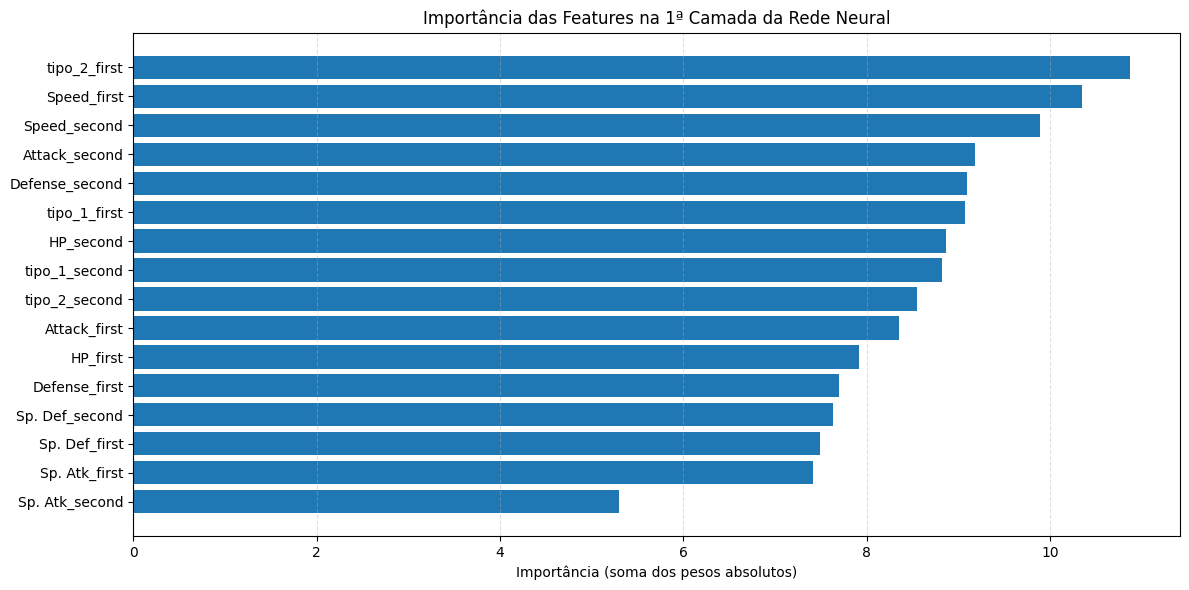

In [83]:
# Nomes das colunas usadas no input
col_names = [
    'HP_first', 'Attack_first', 'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
    'HP_second', 'Attack_second', 'Defense_second', 'Sp. Atk_second', 'Sp. Def_second', 'Speed_second',
    'tipo_1_first', 'tipo_2_first', 'tipo_1_second', 'tipo_2_second'
]

# 1️⃣ Pega os pesos da primeira camada (entrada → 1ª camada oculta)
first_layer_weights = np.abs(model.weights[0])  # shape: (n_features, n_neurons)

# 2️⃣ Soma os pesos absolutos para cada feature
feature_importance = np.sum(first_layer_weights, axis=1)

# 3️⃣ Ordena as features pela importância
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_names = [col_names[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# 4️⃣ Plota o gráfico
plt.figure(figsize=(12, 6))
plt.barh(sorted_names[::-1], sorted_importance[::-1])  # inverte pra maior no topo
plt.xlabel('Importância (soma dos pesos absolutos)')
plt.title('Importância das Features na 1ª Camada da Rede Neural')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.show()
